# 합성곱 연산
* 완전연결층은 입력값 모두에서 패턴을 찾기 때문에 입력값 모두가 변수고 가중치이다.
* Conv는 윈도우 크기(3x3)으로 나눠서 지역 패턴을 찾는다.
    * 학습된 패턴은 평행 이동 불편성을 갖는다
        * 고양이 눈이 화면 어디에 있든 중요하지 않다
        * 그냥 고양이 눈이다.
        * 만약 완전연결층이면 고양이 눈은 항상 거기 있어야 한다.
    * 패턴의 공간적 계층 구조를 학습할 수 있다
        * 단계를 여러번 두면 선이 면이 되고 면이 도형이 되서 점점 더 구체화
* Conv 층은 입력과 출력으로 특성맵(feature map)이라는 것을 사용
    * 3D 텐서 형식, (w, h, filter)
    * 최초 ConvD는 (w,h,c)인데 그 다음 부터는 필터를 지정한 대로 생성
    * 커널(윈도우)은 keras의 Conv2D(depth, (h, w))로 생성
        * (h, w)로 출력 크기가 결정, summary()로 확인


# 최대 풀링연산(MaxPool)
* 특성맵을 다운 샘플링하는 역할, 작게 만든다
    * 2x2크기의 윈도우로 걸쳐서 그 안에 있는 값 중 중 최대 값만 취한다.
    * 스트라이드는 보통 2
* 이걸 안하면?
    * 최종 층의 윈도우 영역은 최초 입력의 특정 영역에 대한 것만 반영
    * 파라미터가 너무 많아서 무조건 과대 적합
    * 어쨌든 크기를 줄이는게 목표
* 최대 풀링말고 평균값을 구하는 평균 풀링도 있다
    * 경험적 결과로 최대 풀링이 우수
    

* Demo : https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html

# Convolution 연산과 필터

(444, 400, 3)


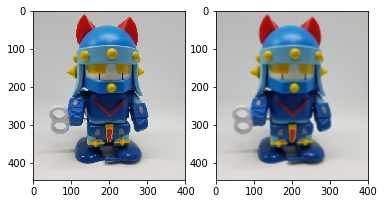

In [11]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pylab as plt
img = cv2.imread('./img/taekwonv1.jpg')
print(img.shape)
'''
#5x5 평균 필터 커널 생성    ---①
kernel = np.array([[0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04]])
'''
# 5x5 평균 필터 커널 생성  ---②
kernel = np.ones((5,5))/5**2
# 필터 적용             ---③
blured = cv2.filter2D(img, -1, kernel)

# 결과 출력

plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(blured[:,:,::-1])


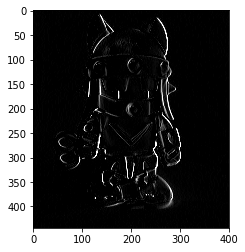

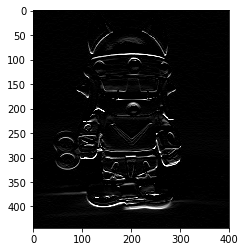

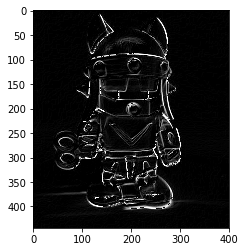

In [21]:
import cv2
import numpy as np
import matplotlib.pylab as plt
img = cv2.imread('./img/taekwonv1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 소벨 커널을 직접 생성해서 엣지 검출 ---①
## 소벨 커널 생성
gx_k = np.array([[-1,0,1],
                 [-2,0,2],
                 [-1,0,1]])

gy_k = np.array([[-1,-2,-1],
                 [0,0,0],
                 [1,2,1]])
## 소벨 필터 적용
edge_gx = cv2.filter2D(img, -1, gx_k)
edge_gy = cv2.filter2D(img, -1, gy_k)


# 결과 출력
plt.imshow(edge_gx, cmap='gray')
plt.show()
plt.imshow(edge_gy, cmap='gray')
plt.show()
plt.imshow(edge_gx + edge_gy, cmap='gray')
plt.show()

# MNIST 예제


In [1]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

W3 = tf.Variable(tf.random_normal([7 * 7 * 64, 256], stddev=0.01))
L3 = tf.reshape(L2, [-1, 7 * 7 * 64])
L3 = tf.matmul(L3, W3)
L3 = tf.nn.relu(L3)
L3 = tf.nn.dropout(L3, keep_prob)

W4 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L3, W4)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        batch_xs = batch_xs.reshape(-1, 28, 28, 1)

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          keep_prob: 0.7})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images.reshape(-1, 28, 28, 1),
                                   Y: mnist.test.labels,
                                   keep_prob: 1}))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch: 0001 Avg. cost = 0.341
Epoch: 0002 Avg. cost = 0.107
Epoch: 0003 Avg. cost = 0.078
Epoch: 0004 Avg.

KeyboardInterrupt: 